In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = plt.imread('image_disney.jpeg') #Φόρτωση της εικόνας στη μεταβλητή img

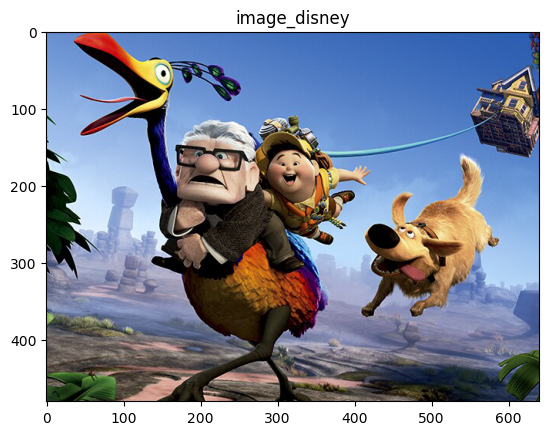

In [3]:
plt.imshow(img)      
plt.title('image_disney')
plt.show()

In [4]:
print(img.shape) # Διάσταση του πίνακα . Είναι 225 Χ 225 θέσεις για τα Pixels. Σε κάθε θέση έχουμε Χ3 για τα 3 χρώματα RGB.

(480, 640, 3)


In [5]:
(img.ndim) # Ο αριθμός των καναλιών χρώματος.

3

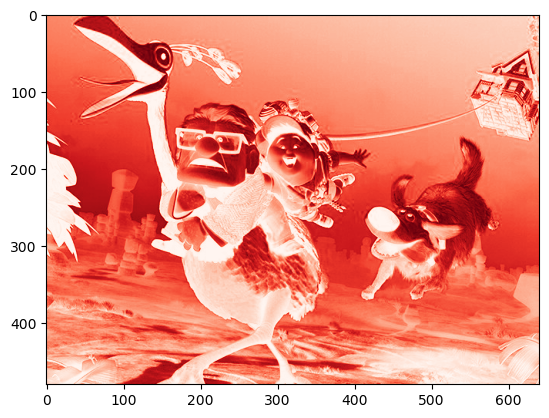

In [6]:
plt.imshow(img[:,:,0], cmap = 'Reds') # Ένταση του κόκκινου σε όλα τα pixels της εικόνας.

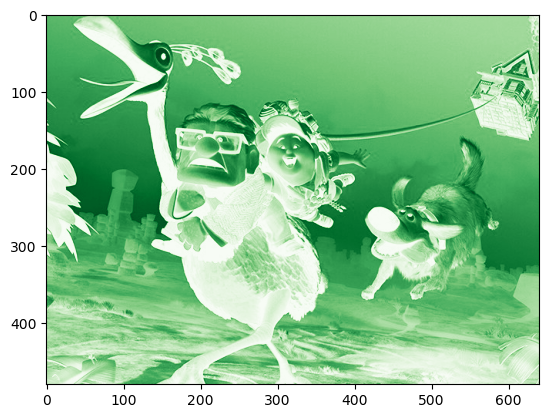

In [7]:
plt.imshow(img[:,:,1], cmap = 'Greens') # Ένταση του πράσινου σε όλα τα pixels της εικόνας.

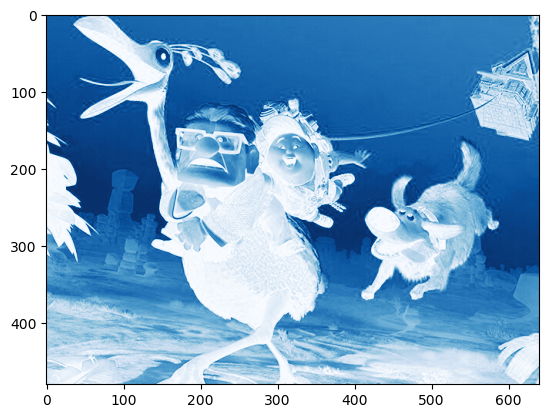

In [8]:
plt.imshow(img[:,:,2], cmap = 'Blues') # Ένταση του μπλε σε όλα τα pixels της εικόνας.

In [9]:
height, width, channels = img.shape # Διαβάζουμε το ύψος, το πλάτος και τα κανάλια της εικόνας στις αντίστοιχες μεταβλητές.

In [10]:
#Τις εμφανίζουμε
print(height)
print(width)
print(channels) 

480
640
3


In [11]:
# Ορίζουμε κατακόρυφη μετατόπιση κατά 1/2 του ύψους της εικόνας και οριζόντια κατά 1/2 του πλάτους
Ty = height/2
Tx = width/2

In [12]:
# Ορίζουμε τον πίνακα μετατόπισης της εικόνας που είναι της μορφής: 
# | 1  0  Τx | 
# | 0  1  Ty |
T = np.float32([[1, 0, Tx], [0, 1, Ty]])

In [13]:
# Τον εμφανίζουμε
print(T)

[[  1.   0. 320.]
 [  0.   1. 240.]]


In [14]:
# Εκτελούμε την μετατόπιση με την WarpAffine και τον πίνακα μετατόπισης που ορίσαμε παραπάνω
img_Translated = cv2.warpAffine(img, T, (width, height))

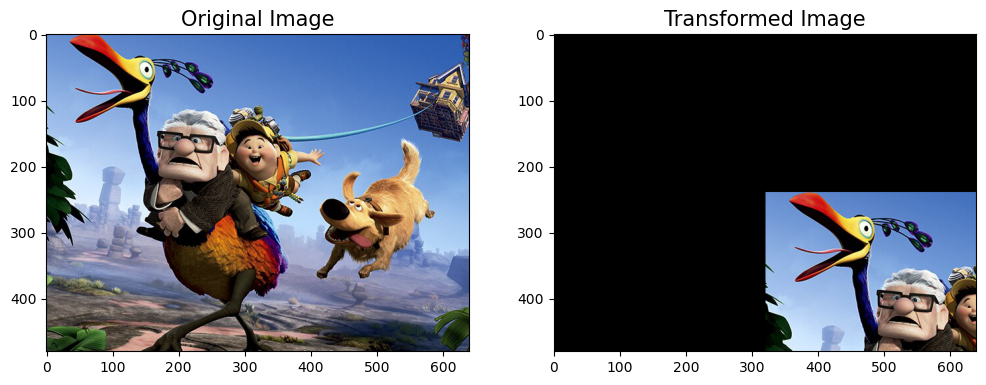

In [15]:
# Εμφανίζουμε σε ένα διάγραμμα δίστηλο , αριστερά την αρχική εικόνα και δεξιά την μετατοπισμένη
plt.figure(figsize=(12,6))
# subplot με μία γραμμή (1) , δύο στήλες (2), στην πρώτη στήλη (1) : 121
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
# subplot με μία γραμμή (1) , δύο στήλες (2), στη δεύτερη στήλη (2) : 122
plt.subplot(122)
plt.imshow(img_Translated)
plt.title('Transformed Image', fontsize = 15)
plt.show()

In [16]:
# Divide width and height by two to rototate the image around its centre
# Με την getRotationMatrix2D η cv2 μας ετοιμάζει τον πίνακα περιστροφής 
# ως προς το κέντρο, τη γωνία και την κλίμακα που θα ορίσουμε
# εδώ κέντρο περιστροφής θέτουμε το κέντρο της εικόνας, γωνία περιστροφής 45 και κλίμακα 1
R = cv2.getRotationMatrix2D(center = (width/2, height/2), angle = 45, scale = 1)

In [17]:
# Rotated image can be obtained by following line of code
# Εκτελούμε την περιστρφή
img_Rotated = cv2.warpAffine(img, R, (width, height))

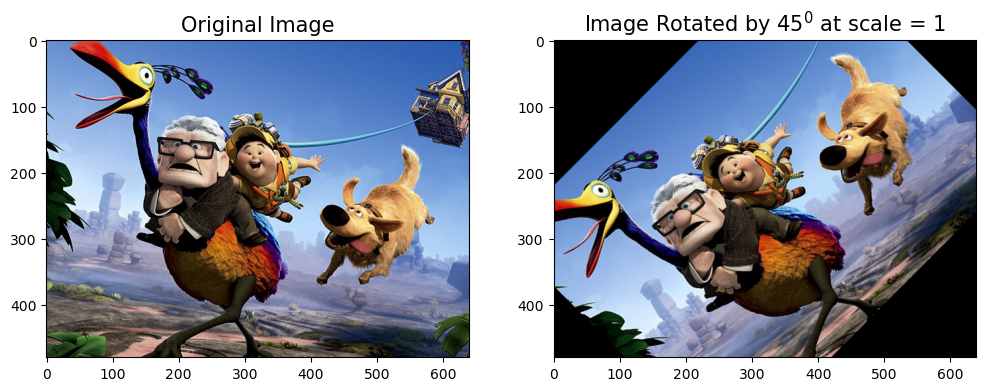

In [18]:
# Εμφανίζουμε την αρχική εικόνα και την περιστραμένη
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_Rotated)
plt.title("Image Rotated by $45^0$ at scale = 1", fontsize = 15)
plt.show()

In [ ]:
# Get the starting coordinates from top left(0,0) and ending coordinates from bottom right (480,640)

 # x1 = starting row value from the top left (0,0)
 # y1 = starting col value from the top left (0,0)
 # x2 = ending row value from the bottom right (480,640)
 # y2 = ending col value from the bottom right (480,640)

# Image cropping means to slice the image

# img_Cropped = img[x1 : x2 , y1 : y2]

In [19]:
x1 = 80
x2 = 200
y1 = 400
y2 = 600

In [20]:
# Φτιάχνουμε ένα αντίγραφο της εικόνας στην img_copy και ζωγραφίζουμε ένα ορθογώνιο με χρώμα 0,255,255 και πάχος γραμμής 5 pixels στην περιοχή που θα αποκόψουμε.
img_copy = img.copy()
img_copy = cv2.rectangle(img_copy, (y1, x1), (y2, x2), (0, 255, 255), 5)

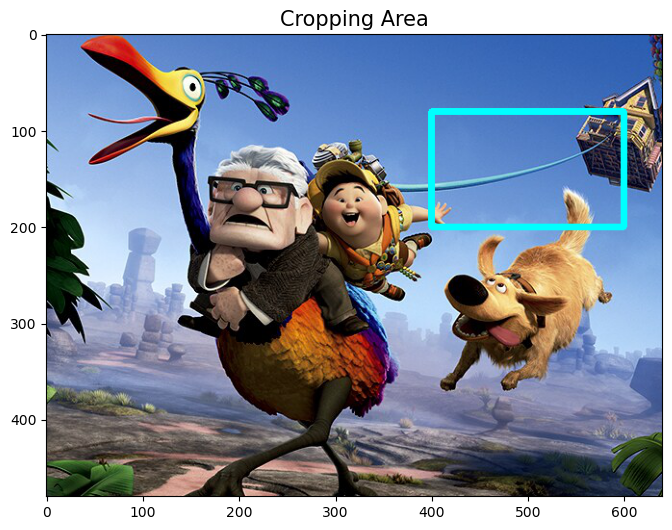

In [21]:
# Εμφανίζουμε το img_copy
plt.figure(figsize=(12,6))
plt.imshow(img_copy)
plt.title("Cropping Area", fontsize = 15)
plt.show()

In [22]:
# στην img_cropped κρατάμε μόνο την περιοχή της αρχικής εικόνας που επιθυμούμε : τις γραμμές x1:x2 και τις στήλες y1:y2.
img_Cropped = img[x1 : x2 , y1 : y2]

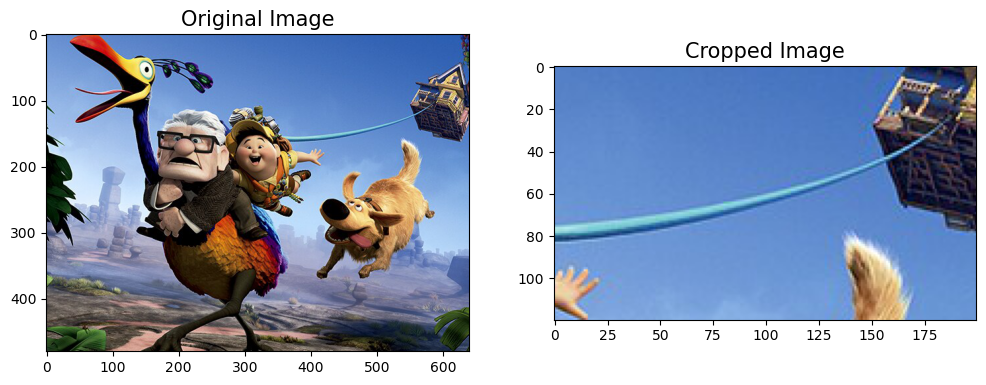

In [23]:
# Εμφανίζουμε την αρχική εικόνα και την cropped.
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_Cropped)
plt.title("Cropped Image", fontsize = 15)
plt.show()